## Introduction

In this project, we will use the Foursquare API to explore hotels in Paris, France. We will use the **explore** function to get the most common venue categories in each neighborhood, and then use this feature to group the neighborhoods into clusters. We will use the *k*-means clustering algorithm to complete this task. Finally, we will use the Folium library to visualize the neighborhoods in Paris and their emerging clusters.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
                                                 
<font size = 3> 
    
1. <a href="#item1">Download and Explore Dataset</a>

2. <a href="#item2">Explore Hotels in Toronto</a>

3. <a href="#item3">Analyse each Hotel</a>

4. <a href="#item4">Cluster Hotels</a>

5. <a href="#item5">Examine Clusters</a>
</font>
</div>

In [1]:
import numpy as np # Library to handle data in a vectorized manner

import pandas as pd #Library for data analysis


print('Libraries imported.')




Libraries imported.


## 1. Download and Explore Dataset

The data is composed of a total of 71 hotels. In order to segment the neighborhoods and explore them, we will essentially need a dataset that contains the 71 hotels as well as the latitude and longitude coordinates of each neighborhood. 

#### Load and Explore the Data

In [2]:
df = pd.read_excel('Data.xlsx')
df

,PostalCode,Hotel_name,Average_price_per_night,Address,Latitude,Longitude
0,75012,MOTEL ONE PARIS - PORTE DOREE,81.000000,295 Avenue Daumesnil,48.834600,2.409720
1,75011,HOTEL LA NOUVELLE REPUBLIQUE,105.000000,9 Rue Moret,48.866950,2.379510
2,75015,Okko Hotels Paris Porte De Versailles,112.000000,2 Rue du Colonel Pierre Avia,48.832280,2.278090
3,75017,Le Tsuba Hotel,154.000000,45 Rue des Acacias,48.877790,2.293190
4,75009,Hotel 34B - Astotel,119.000000,34 Rue Bergère,48.872680,2.343580
5,75008,Idol Hotel,128.000000,16 Rue d'Édimbourg,48.879470,2.320320
6,75005,Select Hotel,163.000000,1 Place de la Sorbonne,48.848400,2.342580
7,75017,Hotel Flanelles Paris,194.000000,14 Rue Brey,48.876530,2.295810
8,75008,Grand Powers,435.000000,52 Rue François 1er,48.869140,2.303150
9,75010,La Planque Hotel,121.000000,3 Rue Arthur Groussier,48.871860,2.370140


In [3]:
df.shape[0] 

71

In [4]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


We will only segment and cluster the hotels in Paris

#### Use geopy to get the latitude and longitude values of Paris

In [5]:

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
address = 'Paris'

geolocater = Nominatim(user_agent = 'tor_explorer')
location = geolocater.geocode(address)
longitude = location.longitude
latitude = location.latitude 
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8566101, 2.3514992.


#### Create  a map of Paris with hotels superimposed on top

In [6]:
# Create a map of Toronto using Latitude and Longitude values
map_paris = folium.Map(location = [latitude, longitude], zoom_start = 10 )

# add markers to map
for lat, lng, address in zip (df['Latitude'], df['Longitude'], df['Address']):
    label  = '{}'.format(address)
    label = folium.Popup(label, parse_html = True)
  
    folium.CircleMarker(
    [lat, lng],
    radius = 5,
    popup = label,
    color = 'green',
    fill = True,
    fill_color = '#3186cc',
    fill_opacity = 0.7,
    parse_html =False).add_to(map_paris)
map_paris


#### Define Foursquare Credentials and Version

In [7]:

Client_ID = 'VUCU0LBXFAPFC0DYX2Y4VPECUKJUBJMU4LC0DBSSENBUYRUL'
Client_SECRET= '2BQU110EBN4QUGAP0BTK3UU1IG1AEECTL0F1K0VZYOINOMSK'
VERSION = '20180605'


#### Let's explore the first hotel in our Dataframe.

Get the Hotel name

In [8]:
df.loc[0, 'Hotel_name']

'MOTEL ONE PARIS - PORTE DOREE'

In [9]:
address_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
address_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value
address_name = df.loc[0, 'Hotel_name'] # neighborhood name

print('Latitude and Longitude vaues of {} are {}, {}'.format(address_name,address_latitude, address_longitude))

Latitude and Longitude vaues of MOTEL ONE PARIS - PORTE DOREE are 48.8346, 2.40972


#### Now, let's get the top 100 venues that are near Motel One Paris within  a radius of 500 meters.

First, let's create the GET request URL.

In [10]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            Client_ID, 
            Client_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
url

'https://api.foursquare.com/v2/venues/explore?&client_id=VUCU0LBXFAPFC0DYX2Y4VPECUKJUBJMU4LC0DBSSENBUYRUL&client_secret=2BQU110EBN4QUGAP0BTK3UU1IG1AEECTL0F1K0VZYOINOMSK&v=20180605&ll=48.83888719999999,2.380572900000061&radius=500&limit=100'

Send the GET request and examine the result

In [11]:
import requests
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d1ef777f19f4400253345aa'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bercy',
  'headerFullLocation': 'Bercy, Paris',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 27,
  'suggestedBounds': {'ne': {'lat': 48.84338720449999,
    'lng': 2.387397190888657},
   'sw': {'lat': 48.834387195499986, 'lng': 2.3737486091114652}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4adcda15f964a520873721e3',
       'name': 'La Cinémathèque Française',
       'location': {'address': '51 rue de Bercy',
        'lat': 48.83701888687139,
        'lng': 2.3821608764435327,
        'labeledLatLngs': [{'label': 'display',
          'lat': 48.83

Now we are ready to clean the json and structure it into a pandas dataframe

In [12]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [13]:
from pandas.io.json import json_normalize 

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,La Cinémathèque Française,Museum,48.837019,2.382161
1,AccorHotels Arena,Music Venue,48.838590,2.378622
2,American Express Live Bar,Lounge,48.839604,2.379246
3,Terrasse Bercy,French Restaurant,48.839091,2.380963
4,Parc de Bercy,Park,48.835501,2.382381
5,Ground Control,Beer Garden,48.843289,2.381090
6,Le Petit Bain,Beer Garden,48.835464,2.376591
7,Jardin Yitzhak Rabin,Garden,48.835687,2.382133
8,Piscine Joséphine Baker,Pool,48.835974,2.375721
9,Le Social Bar,Beer Bar,48.841754,2.375359


## 2. Explore Hotels in Paris

#### Let's create a function to repeat the same process to all hotel in Paris

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            Client_ID, 
            Client_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    # Transform the data into a panda Dataframe
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Hotel_name', 
                  'Hotel Latitude', 
                  'Hotel Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now, we are going to write the code to run the abode function on each hotel and create a new dataframe called paris_venues

In [15]:

paris_venues = getNearbyVenues(names=df['Hotel_name'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )


MOTEL ONE PARIS - PORTE DOREE
HOTEL LA NOUVELLE REPUBLIQUE
Okko Hotels Paris Porte De Versailles
Le Tsuba Hotel
Hotel 34B - Astotel
Idol Hotel
Select Hotel
Hotel Flanelles Paris
Grand Powers
La Planque Hotel
Ibis Budget Paris Porte De Montmartre
Villa Royale Montsouris
Hotel des Belges
Pavillon Nation 
Hotel Cosmos
Tour Eiffel Grenelle
Ritz Paris
Le clos de l'olivier 
Hotel The Peninsula Paris
Fauchon l'Hotel 
Hôtel Saint-Marc
 La Maison Favart
Le 123 Sébastopol - Astotel 
Hôtel Square Louvois
Hôtel Edouard 7 Opéra
La Chambre du Marais 
Le Pavillon de la Reine & Spa
Hôtel Les Bains Paris
Hôtel National Des Arts et Métiers
Hotel du Petit Moulin
Paris France Hotel 
Goralska Résidences Hôtel 
Hôtel de Joséphine BONAPARTE
Hôtel Du Jeu De Paume
Hôtel de Lutèce
Hôtel Dupond-Smith
9Confidentiel
Hôtel D'Aubusson 
Millésime Hôtel
Hôtel Victoire & Germain
Relais Christine
Hôtel Le Six
Hôtel Baume 
Le Narcisse Blanc 
Hotel d'Orsay - Esprit de France
Hôtel Muguet 
Hôtel Le Petit Chomel 
Hôtel de L

#### Let's check the size of the resulting Dataframe

In [16]:
print(paris_venues.shape)
paris_venues.head()

(5933, 7)


,Hotel_name,Hotel Latitude,Hotel Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,MOTEL ONE PARIS - PORTE DOREE,48.8346,2.40972,Hotel Motel One Paris-Porte Dorée,48.834699,2.409975,Hotel
1,MOTEL ONE PARIS - PORTE DOREE,48.8346,2.40972,Palais de la Porte Dorée – Musée national de l...,48.834870,2.409036,History Museum
2,MOTEL ONE PARIS - PORTE DOREE,48.8346,2.40972,Vandermeersch,48.835670,2.405663,Bakery
3,MOTEL ONE PARIS - PORTE DOREE,48.8346,2.40972,Porte Dorée,48.835286,2.406709,Plaza
4,MOTEL ONE PARIS - PORTE DOREE,48.8346,2.40972,Pizza cosi,48.835254,2.406674,Pizza Place


Let's check how many venues returned for each hotel.

In [17]:
paris_venues.groupby('Hotel_name').count()

,Hotel Latitude,Hotel Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Hotel_name,,,,,,
9Confidentiel,100,100,100,100,100,100
Fauchon l'Hotel,100,100,100,100,100,100
Four Seasons Hotel George V,100,100,100,100,100,100
Goralska Résidences Hôtel,52,52,52,52,52,52
Grand Powers,100,100,100,100,100,100
HOTEL LA NOUVELLE REPUBLIQUE,100,100,100,100,100,100
Hotel 34B - Astotel,200,200,200,200,200,200
Hotel Cosmos,100,100,100,100,100,100
Hotel Flanelles Paris,100,100,100,100,100,100


Let's found how many unique categories can be curated from all returned venues

In [18]:
print('There are {} unique categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 262 unique categories.


## 3. Analyse Each Hotel

In [19]:
# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Hotel_name'] = paris_venues['Hotel_name'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.head()

,Hotel_name,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo Exhibit
0,MOTEL ONE PARIS - PORTE DOREE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,MOTEL ONE PARIS - PORTE DOREE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,MOTEL ONE PARIS - PORTE DOREE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,MOTEL ONE PARIS - PORTE DOREE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,MOTEL ONE PARIS - PORTE DOREE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [20]:
paris_onehot.shape

(5933, 263)

#### Now, let's group rows by hotel and by taking the mean of the frequency of occurence of each category.

In [21]:
paris_grouped = paris_onehot.groupby('Hotel_name').mean().reset_index()
paris_grouped

,Hotel_name,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo Exhibit
0,9Confidentiel,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.020000,0.010000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000,0.00,0.000000
1,Fauchon l'Hotel,0.01,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.010000,0.000000,0.000000,0.010000,0.030000,0.00,0.000000
2,Four Seasons Hotel George V,0.01,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.010000,0.010000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.00,0.000000
3,Goralska Résidences Hôtel,0.00,0.000000,0.019231,0.00,0.000000,0.00,0.000000,0.000000,0.038462,...,0.000000,0.00,0.019231,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.019231
4,Grand Powers,0.01,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.010000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.00,0.000000
5,HOTEL LA NOUVELLE REPUBLIQUE,0.00,0.030000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.00,0.010000,0.020000,0.000000,0.040000,0.000000,0.000000,0.01,0.000000
6,Hotel 34B - Astotel,0.00,0.000000,0.010000,0.00,0.000000,0.01,0.010000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.040000,0.000000,0.010000,0.00,0.000000
7,Hotel Cosmos,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.010000,0.000000,...,0.000000,0.00,0.010000,0.010000,0.000000,0.030000,0.020000,0.000000,0.01,0.000000
8,Hotel Flanelles Paris,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
9,Hotel La Lanterne,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.010000,0.000000,0.030000,0.010000,0.000000,0.00,0.000000


Let's confirm the new size.

In [22]:
paris_grouped.shape

(70, 263)

#### Let's print each hotel along with the top 5 most common venues

In [23]:
num_top_venues = 5

for hood in paris_grouped['Hotel_name']:
    print('----'+hood+'----')
    temp = paris_grouped[paris_grouped['Hotel_name'] == hood].T.reset_index()
    temp.columns = ['venues' , 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq':2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop= True).head(num_top_venues))
    print('\n')
    

----9Confidentiel----
              venues  freq
0  French Restaurant  0.11
1     Clothing Store  0.04
2        Pastry Shop  0.04
3       Cocktail Bar  0.03
4           Wine Bar  0.03


----Fauchon l'Hotel ----
              venues  freq
0              Hotel  0.20
1  French Restaurant  0.14
2           Boutique  0.12
3     Clothing Store  0.04
4       Gourmet Shop  0.04


----Four Seasons Hotel George V ----
               venues  freq
0               Hotel  0.18
1   French Restaurant  0.11
2  Italian Restaurant  0.05
3            Boutique  0.05
4           Hotel Bar  0.03


----Goralska Résidences Hôtel ----
              venues  freq
0  French Restaurant  0.17
1              Hotel  0.12
2             Museum  0.04
3   Pedestrian Plaza  0.04
4               Park  0.04


----Grand Powers----
               venues  freq
0               Hotel  0.13
1   French Restaurant  0.12
2            Boutique  0.06
3      Clothing Store  0.04
4  Italian Restaurant  0.04


----HOTEL LA NOUVELLE REPUBL

#### Let's put that into a pandas dataframe

First, let's write a function to sort the venues into a descending order.

In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now, let's create the new dataframe and display th top 10 venues for each hotel.

In [25]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Hotel_name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
hotels_venues_sorted = pd.DataFrame(columns=columns)
hotels_venues_sorted['Hotel_name'] = paris_grouped['Hotel_name']

for ind in np.arange(paris_grouped.shape[0]):
    hotels_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

hotels_venues_sorted.head()

,Hotel_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,9Confidentiel,French Restaurant,Clothing Store,Pastry Shop,Cocktail Bar,Ice Cream Shop,Wine Bar,Gourmet Shop,Men's Store,Bar,Bakery
1,Fauchon l'Hotel,Hotel,French Restaurant,Boutique,Gourmet Shop,Clothing Store,Women's Store,Dessert Shop,Salad Place,Theater,Asian Restaurant
2,Four Seasons Hotel George V,Hotel,French Restaurant,Boutique,Italian Restaurant,Bakery,Hotel Bar,Jewelry Store,Bistro,Tailor Shop,Cosmetics Shop
3,Goralska Résidences Hôtel,French Restaurant,Hotel,Pedestrian Plaza,Japanese Restaurant,Bus Stop,Museum,Art Museum,Cocktail Bar,Park,Southwestern French Restaurant
4,Grand Powers,Hotel,French Restaurant,Boutique,Italian Restaurant,Clothing Store,Cosmetics Shop,Tailor Shop,Hotel Bar,Spa,Steakhouse


### 4. Cluster Hotels

Run k-means to cluster the hotels into 5 clusters.

In [28]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 3, 3, 0, 3, 4, 2, 4, 0, 2], dtype=int32)

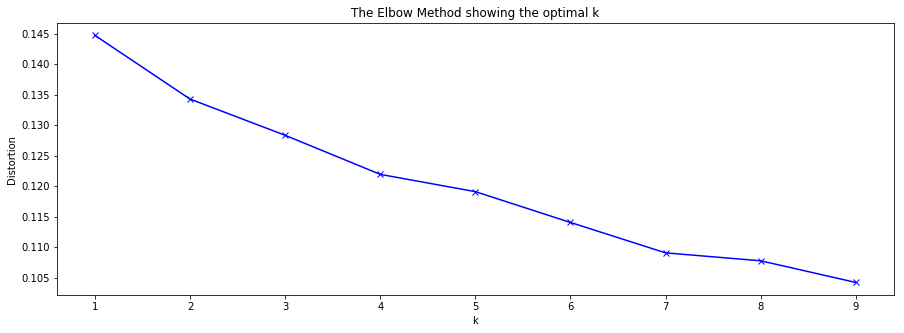

In [30]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

distortions= []
paris_grouped_clustering = paris_grouped.drop('Hotel_name', 1)
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(paris_grouped_clustering)
    distortions.append(sum(np.min(cdist(paris_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / paris_grouped_clustering.shape[0])

# Plot the elbow
plt.figure(figsize=(15,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Let's create a dataframe that includes the cluster as well as the top 10 venues for each hotel.

In [29]:
# add clustering labels
hotels_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

paris_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
paris_merged = paris_merged.join(hotels_venues_sorted.set_index('Hotel_name'), on='Hotel_name')

paris_merged.head() # check the last columns!

,PostalCode,Hotel_name,Average_price_per_night,Address,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,75012,MOTEL ONE PARIS - PORTE DOREE,81.0,295 Avenue Daumesnil,48.83460,2.40972,1,Hotel,Bistro,Bike Rental / Bike Share,Tennis Stadium,Plaza,Park,Sandwich Place,Café,Fast Food Restaurant,Flower Shop
1,75011,HOTEL LA NOUVELLE REPUBLIQUE,105.0,9 Rue Moret,48.86695,2.37951,4,Bar,French Restaurant,Pizza Place,Wine Bar,Cocktail Bar,African Restaurant,Coffee Shop,Burger Joint,Mexican Restaurant,Rock Club
2,75015,Okko Hotels Paris Porte De Versailles,112.0,2 Rue du Colonel Pierre Avia,48.83228,2.27809,3,Hotel,Japanese Restaurant,Gym / Fitness Center,Fast Food Restaurant,Multiplex,Sporting Goods Shop,Sandwich Place,Bike Rental / Bike Share,Nightclub,Salad Place
3,75017,Le Tsuba Hotel,154.0,45 Rue des Acacias,48.87779,2.29319,0,Hotel,French Restaurant,Italian Restaurant,Bakery,Bistro,Plaza,Vietnamese Restaurant,Brasserie,Breton Restaurant,Asian Restaurant
4,75009,Hotel 34B - Astotel,119.0,34 Rue Bergère,48.87268,2.34358,2,French Restaurant,Hotel,Thai Restaurant,Wine Bar,Burger Joint,Pedestrian Plaza,Cocktail Bar,Pizza Place,Bistro,Furniture / Home Store


Finally, let's vizualise the resulting clusters.

In [31]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_merged['Latitude'], paris_merged['Longitude'], paris_merged['Hotel_name'], paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [32]:
paris_merged.loc[paris_merged['Cluster Labels'] == 0, paris_merged.columns[[0]+ [1] + [2]+list(range(6, paris_merged.shape[1]))]]

,PostalCode,Hotel_name,Average_price_per_night,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,75017,Le Tsuba Hotel,154.000000,0,Hotel,French Restaurant,Italian Restaurant,Bakery,Bistro,Plaza,Vietnamese Restaurant,Brasserie,Breton Restaurant,Asian Restaurant
5,75008,Idol Hotel,128.000000,0,French Restaurant,Hotel,Italian Restaurant,Thai Restaurant,Bakery,Pub,Restaurant,Theater,Korean Restaurant,Gym / Fitness Center
7,75017,Hotel Flanelles Paris,194.000000,0,French Restaurant,Hotel,Italian Restaurant,Bakery,Bistro,Seafood Restaurant,Jewelry Store,Asian Restaurant,Thai Restaurant,Scandinavian Restaurant
10,75018,Ibis Budget Paris Porte De Montmartre,60.000000,0,French Restaurant,Hotel,Bar,Park,Italian Restaurant,Japanese Restaurant,Electronics Store,Pizza Place,Turkish Restaurant,Plaza
12,75010,Hotel des Belges,75.000000,0,French Restaurant,Indian Restaurant,Hotel,Japanese Restaurant,Hostel,Coffee Shop,Bar,Bakery,Bistro,Italian Restaurant
15,75015,Tour Eiffel Grenelle,146.934461,0,Hotel,French Restaurant,Bakery,Bistro,Japanese Restaurant,Italian Restaurant,Coffee Shop,Salon / Barbershop,Market,Brasserie
17,75015,Le clos de l'olivier,250.000000,0,French Restaurant,Hotel,Café,Thai Restaurant,Italian Restaurant,Bus Stop,Bakery,Supermarket,Coffee Shop,Korean Restaurant
18,75016,Hotel The Peninsula Paris,965.539112,0,Hotel,French Restaurant,Italian Restaurant,Jewelry Store,Sandwich Place,Bakery,Men's Store,Bagel Shop,Scandinavian Restaurant,Food & Drink Shop
31,75004,Goralska Résidences Hôtel,279.281184,0,French Restaurant,Hotel,Pedestrian Plaza,Japanese Restaurant,Bus Stop,Museum,Art Museum,Cocktail Bar,Park,Southwestern French Restaurant
43,75007,Le Narcisse Blanc,437.843552,0,French Restaurant,Hotel,Plaza,History Museum,Bakery,Beer Garden,Cocktail Bar,Bar,Park,Coffee Shop


In [33]:
paris_merged.loc[paris_merged['Cluster Labels'] == 1, paris_merged.columns[[0]+ [1] + [2]+list(range(6, paris_merged.shape[1]))]]

,PostalCode,Hotel_name,Average_price_per_night,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,75012,MOTEL ONE PARIS - PORTE DOREE,81.000000,1,Hotel,Bistro,Bike Rental / Bike Share,Tennis Stadium,Plaza,Park,Sandwich Place,Café,Fast Food Restaurant,Flower Shop
22,75002,Le 123 Sébastopol - Astotel,169.344609,1,Cocktail Bar,French Restaurant,Hotel,Bar,Italian Restaurant,Bakery,Restaurant,Wine Bar,Vietnamese Restaurant,Chinese Restaurant
23,75002,Hôtel Square Louvois,247.145877,1,Japanese Restaurant,French Restaurant,Hotel,Korean Restaurant,Italian Restaurant,Coffee Shop,Ramen Restaurant,Sushi Restaurant,Bakery,Pastry Shop
24,75002,Hôtel Edouard 7 Opéra,304.016913,1,Japanese Restaurant,Hotel,French Restaurant,Sandwich Place,Korean Restaurant,Italian Restaurant,Udon Restaurant,Coffee Shop,Cocktail Bar,Bakery
25,75003,La Chambre du Marais,233.403805,1,French Restaurant,Bistro,Vietnamese Restaurant,Art Gallery,Italian Restaurant,Wine Bar,Café,Boutique,Coffee Shop,Japanese Restaurant
27,75003,Hôtel Les Bains Paris,346.511628,1,French Restaurant,Cocktail Bar,Chinese Restaurant,Japanese Restaurant,Hotel,Art Gallery,Ice Cream Shop,Italian Restaurant,Bakery,Thai Restaurant
28,75003,Hôtel National Des Arts et Métiers,213.742072,1,French Restaurant,Cocktail Bar,Hotel,Chinese Restaurant,Japanese Restaurant,Italian Restaurant,Wine Bar,Coffee Shop,Thai Restaurant,Pedestrian Plaza
29,75003,Hotel du Petit Moulin,238.477801,1,Bistro,Café,Clothing Store,French Restaurant,Boutique,Wine Bar,Japanese Restaurant,Burger Joint,Sandwich Place,Restaurant
30,75003,Paris France Hotel,121.987315,1,French Restaurant,Wine Bar,Hotel,Bistro,Restaurant,Chinese Restaurant,Vietnamese Restaurant,Cocktail Bar,Sandwich Place,Japanese Restaurant
41,75006,Hôtel Le Six,224.947146,1,Hotel,French Restaurant,Creperie,Japanese Restaurant,Café,Ice Cream Shop,Chinese Restaurant,Bakery,Theater,Italian Restaurant


In [34]:
paris_merged.loc[paris_merged['Cluster Labels'] == 2, paris_merged.columns[[0]+ [1] + [2]+list(range(6, paris_merged.shape[1]))]]

,PostalCode,Hotel_name,Average_price_per_night,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,75009,Hotel 34B - Astotel,119.000000,2,French Restaurant,Hotel,Thai Restaurant,Wine Bar,Burger Joint,Pedestrian Plaza,Cocktail Bar,Pizza Place,Bistro,Furniture / Home Store
6,75005,Select Hotel,163.000000,2,Hotel,French Restaurant,Bar,Bookstore,Indie Movie Theater,Pub,Coffee Shop,Wine Bar,Bistro,Café
13,75011,Pavillon Nation,101.902748,2,French Restaurant,Bar,Bistro,Thai Restaurant,Hotel,Japanese Restaurant,Pizza Place,Chinese Restaurant,Café,Diner
20,75002,Hôtel Saint-Marc,236.575053,2,French Restaurant,Hotel,Japanese Restaurant,Bistro,Italian Restaurant,Furniture / Home Store,Bar,Pastry Shop,Pedestrian Plaza,Pizza Place
21,75002,La Maison Favart,257.928118,2,French Restaurant,Japanese Restaurant,Hotel,Italian Restaurant,Bookstore,Pastry Shop,Salad Place,Sandwich Place,Cocktail Bar,Coffee Shop
26,75003,Le Pavillon de la Reine & Spa,395.137421,2,French Restaurant,Coffee Shop,Hotel,Pizza Place,Tea Room,Italian Restaurant,Bakery,Art Gallery,Plaza,Tapas Restaurant
32,75004,Hôtel de Joséphine BONAPARTE,216.913319,2,French Restaurant,Hotel,Clothing Store,Bakery,Italian Restaurant,Tea Room,Garden,Thai Restaurant,Art Gallery,Tapas Restaurant
33,75004,Hôtel Du Jeu De Paume,209.302326,2,French Restaurant,Wine Bar,Creperie,Thai Restaurant,Italian Restaurant,Ice Cream Shop,Museum,Plaza,Seafood Restaurant,Pedestrian Plaza
34,75004,Hôtel de Lutèce,195.137421,2,French Restaurant,Ice Cream Shop,Park,Bakery,Wine Bar,Japanese Restaurant,Plaza,Hotel,Coffee Shop,Thai Restaurant
35,75004,Hôtel Dupond-Smith,441.437632,2,French Restaurant,Clothing Store,Pastry Shop,Restaurant,Bakery,Ice Cream Shop,Falafel Restaurant,Pub,Sushi Restaurant,Gay Bar


In [35]:
paris_merged.loc[paris_merged['Cluster Labels'] == 3, paris_merged.columns[[0]+ [1] + [2]+list(range(6, paris_merged.shape[1]))]]

,PostalCode,Hotel_name,Average_price_per_night,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,75015,Okko Hotels Paris Porte De Versailles,112.000000,3,Hotel,Japanese Restaurant,Gym / Fitness Center,Fast Food Restaurant,Multiplex,Sporting Goods Shop,Sandwich Place,Bike Rental / Bike Share,Nightclub,Salad Place
8,75008,Grand Powers,435.000000,3,Hotel,French Restaurant,Boutique,Italian Restaurant,Clothing Store,Cosmetics Shop,Tailor Shop,Hotel Bar,Spa,Steakhouse
11,75014,Villa Royale Montsouris,108.879493,3,Hotel,Restaurant,Italian Restaurant,Supermarket,Sushi Restaurant,Plaza,Dessert Shop,Diner,Discount Store,Sandwich Place
16,75001,Ritz Paris,1200.000000,3,Hotel,French Restaurant,Plaza,Chocolate Shop,Cocktail Bar,Hotel Bar,Pastry Shop,Shoe Store,Boutique,Bookstore
19,75008,Fauchon l'Hotel,478.646934,3,Hotel,French Restaurant,Boutique,Gourmet Shop,Clothing Store,Women's Store,Dessert Shop,Salad Place,Theater,Asian Restaurant
54,75001,Hôtel Le Meurice,1000.000000,3,Hotel,French Restaurant,Japanese Restaurant,Boutique,Hotel Bar,Chocolate Shop,Plaza,Art Museum,Tea Room,Accessories Store
55,75001,Hôtel Le Burgundy Paris,90.913561,3,French Restaurant,Hotel,Boutique,Gourmet Shop,Men's Store,Clothing Store,Chocolate Shop,Women's Store,Shoe Store,Sandwich Place
56,75008,Hotel de Crillon,1200.000000,3,French Restaurant,Boutique,Hotel,Gourmet Shop,Clothing Store,Women's Store,Hotel Bar,Shoe Store,Accessories Store,Dessert Shop
57,75008,Four Seasons Hotel George V,1026.849894,3,Hotel,French Restaurant,Boutique,Italian Restaurant,Bakery,Hotel Bar,Jewelry Store,Bistro,Tailor Shop,Cosmetics Shop
58,75009,Hôtel R de Paris,877.000000,3,Hotel,French Restaurant,Italian Restaurant,Bar,Bistro,Japanese Restaurant,Theater,Cocktail Bar,Comedy Club,Pizza Place
